##**Stock Market Prediction model using LSTM**
This notebook contains all the utils required for the modeling no other files are needed to be imported from outside



All the necessary packages are need to be imported
the data is retrieved from the Yahoo Finance 


In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
from matplotlib import pyplot as plt

In [ ]:
df = web.DataReader('AAPL',data_source = 'yahoo',start = '2006-08-14',end = '2021-03-10')

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-08-14,2.329286,2.271429,2.287500,2.283571,717620400.0,1.966984
2006-08-15,2.375000,2.314286,2.333571,2.373214,861352800.0,2.044200
2006-08-16,2.431071,2.368929,2.396429,2.427857,781284000.0,2.091267
2006-08-17,2.452143,2.399286,2.428571,2.413929,581148400.0,2.079270
2006-08-18,2.442857,2.402143,2.418214,2.425357,536354000.0,2.089114


##Closing Price   



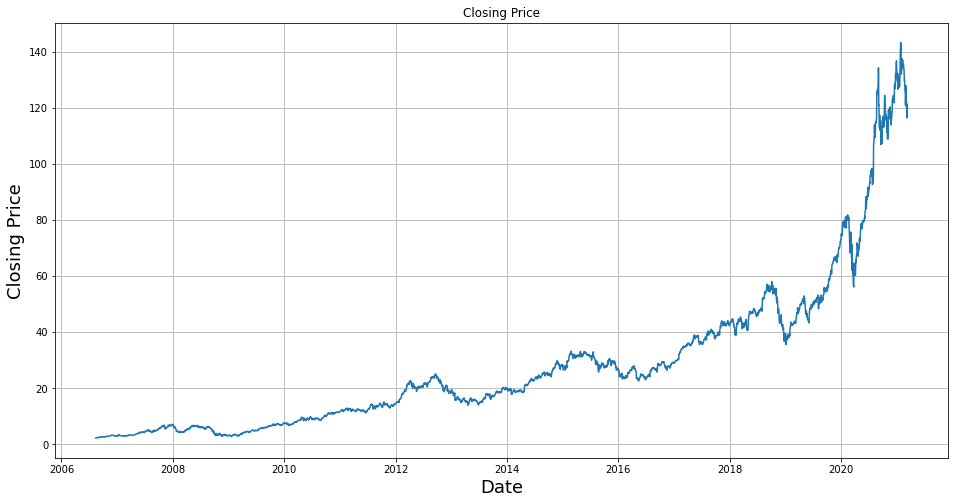

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Closing Price')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Closing Price',fontsize = 18)
plt.plot(df['Close'])
plt.grid(True)
plt.show()

In [ ]:
#Close Column
data = df.filter(['Close'])
dataset = data.values

# Number of examples for training
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2935

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

#Data converted into the range from 0 to 1
scaled_data.shape

(3668, 1)

In [ ]:
#Create the trainning data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]

# split the data into x_train and y_train data sets
x_train = []
y_train = []
print(len(train_data))
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


2935


In [ ]:
# Convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2875, 60)

In [ ]:
#Reshape the data

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape
 

(2875, 60, 1)

In [ ]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the mdoel
model.compile(optimizer='adam',loss = 'mean_squared_error')


In [ ]:
#Train the mdoel
model.fit(x_train,y_train,batch_size=1 ,epochs= 5)

Epoch 1/5
2875/2875 [==============================] - 66s 22ms/step - loss: 1.8713e-04
Epoch 2/5
2875/2875 [==============================] - 64s 22ms/step - loss: 5.0334e-05
Epoch 3/5
2875/2875 [==============================] - 63s 22ms/step - loss: 4.3228e-05
Epoch 4/5
2875/2875 [==============================] - 63s 22ms/step - loss: 2.7830e-05
Epoch 5/5
2875/2875 [==============================] - 63s 22ms/step - loss: 2.7361e-05


In [ ]:
#create the testing data
#New array from the index 1621 to 2111
test_data = scaled_data[training_data_len - 60:,:]

#create x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0]) 


In [ ]:
# Convert test data into array
x_test = np.array(x_test)


In [ ]:
# Reshape Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.6883740756879236

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


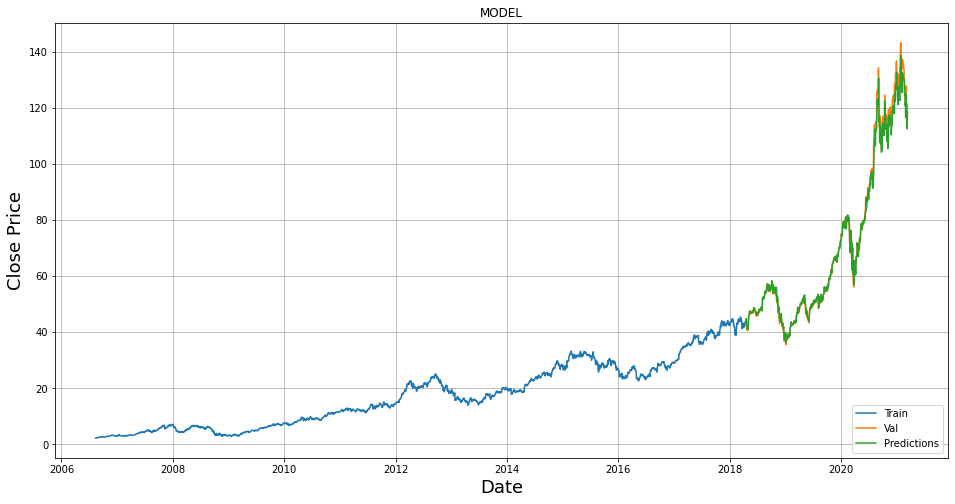

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize = (16,8))
plt.title('MODEL')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.grid()
plt.show()


In [ ]:
valid

,Close,Predictions
Date,,
2018-04-12,43.535000,43.453896
2018-04-13,43.682499,43.856304
2018-04-16,43.955002,43.987453
2018-04-17,44.560001,44.248016
2018-04-18,44.459999,44.823109
...,...,...
2021-03-04,120.129997,118.284103
2021-03-05,121.419998,116.362976
2021-03-08,116.360001,118.107262


In [ ]:
apple_quote = web.DataReader('AAPL',data_source = 'yahoo',start = '2006-08-14',end = '2021-3-13')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
#print(last_60_days)
last_60_days_scaled = scaler.transform(last_60_days)


X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1 ))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[117.814766]]
